## General inshights
This notebook helps to create general insights into the model. First some specific policies are defined after which the costs, damage and deaths are visualised


At first, some libraries are loaded and the problem formulation is called. For this, problem formulation 2 is used

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import (Model, CategoricalParameter, ScalarOutcome, IntegerParameter, RealParameter)
from ema_workbench import (Model, MultiprocessingEvaluator, SequentialEvaluator, Policy, Scenario, Constant)
from dike_model_function import DikeNetwork 

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

def sum_over(*args):
    return sum(args)

Next, policies are defined. The first fifty are for dike heightenings from 0 to 9 dm for each dike ring. The next 10 are the same heightenings but for all dike rings combined. Finally the last policy is the implementation of all rfr projects.
For all policies, the evacuation warning signal is set to 3

After the policies defenition, the model is run over 50 random scenarios.

In [6]:
policies = [ 
        Policy((str('A1_')+str(i)), **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 3,
                    'A.1_DikeIncrease 0': i, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0}) for i in range(10)
]

policies += [ 
        Policy((str('A2_')+str(i)), **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 3,
                    'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': i, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0}) for i in range(10)
]
policies += [ 
        Policy((str('A3_')+str(i)), **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 3,
                    'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': i, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0}) for i in range(10)
]
policies += [ 
        Policy((str('A4_')+str(i)), **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 3,
                    'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': i, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0}) for i in range(10)
]
policies += [ 
        Policy((str('A5_')+str(i)), **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 3,
                    'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': i, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0}) for i in range(10)
]
policies += [ 
        Policy((str('All_dikes_')+str(i)), **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 3,
                    'A.1_DikeIncrease 0': i, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': i, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': i, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': i, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': i, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0}) for i in range(10)
]
policies += [ 
        Policy('All_rfr_0', **{'0_RfR 0': 1, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 1, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 1, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 1, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 1, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 3,
                    'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})
]

In [41]:
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=policies)
    
experiments, outcomes = results

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 50 scenarios * 61 policies * 1 model(s) = 3050 experiments
[MainProcess/INFO] 305 cases completed
[MainProcess/INFO] 610 cases completed
[MainProcess/INFO] 915 cases completed
[MainProcess/INFO] 1220 cases completed
[MainProcess/INFO] 1525 cases completed
[MainProcess/INFO] 1830 cases completed
[MainProcess/INFO] 2135 cases completed
[MainProcess/INFO] 2440 cases completed
[MainProcess/INFO] 2745 cases completed
[MainProcess/INFO] 3050 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


Next, the mean is calculated per policy and per KPI and stored in a new dataframe 'outcomes_mean'.
Following are three plots of dike investment costs, expected annual damage and expected number of deaths which are interpreted in the report

In [42]:
outcomes_mean = pd.DataFrame()
single_mean = {}

for policy in np.unique(experiments['policy']): #loop x times for x different unique policies
    logical = experiments['policy']==policy #series of true/false for policy iteration
    for key in outcomes.keys(): #loop x times for each key in outcomes
        single_mean[key] = np.mean(outcomes[key][logical]) #calculate the mean per unique policy/key combination
    outcomes_mean = outcomes_mean.append(pd.DataFrame(single_mean, index = [policy[-1]])) #add the unique means to the dataframe. Index is dike heightening.

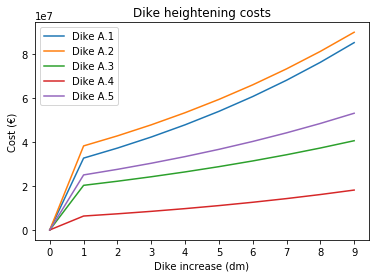

In [43]:
data = outcomes_mean['Dike Investment Costs']

fig, ax = plt.subplots()
plt.plot(data[:10], label='Dike A.1')
plt.plot(data[10:20], label='Dike A.2')
plt.plot(data[20:30], label='Dike A.3')
plt.plot(data[30:40], label='Dike A.4')
plt.plot(data[40:50], label='Dike A.5')
plt.legend()
ax.set_ylabel('Cost (€)')
ax.set_xlabel('Dike increase (dm)')
ax.set_title('Dike heightening costs')

plt.show
plt.savefig('export/images/dikeincrease.png', dpi=300)

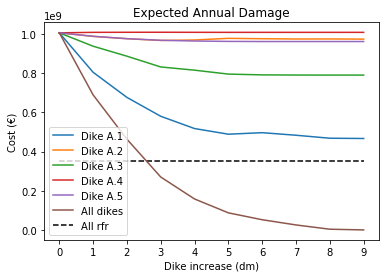

In [44]:
from matplotlib import pyplot as plt

data = outcomes_mean['Expected Annual Damage']

fig, ax = plt.subplots()
plt.plot(data[:10], label='Dike A.1')
plt.plot(data[10:20], label='Dike A.2')
plt.plot(data[20:30], label='Dike A.3')
plt.plot(data[30:40], label='Dike A.4')
plt.plot(data[40:50], label='Dike A.5')
plt.plot(data[50:60], label='All dikes')
plt.hlines(data[60],0,9,linestyles='dashed', label='All rfr')
plt.legend()
ax.set_ylabel('Cost (€)')
ax.set_xlabel('Dike increase (dm)')
ax.set_title('Expected Annual Damage')

plt.show
plt.savefig('export/images/expected_damage.png', dpi=300)

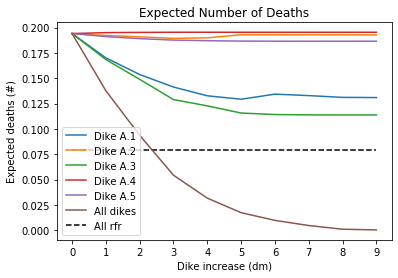

In [45]:
from matplotlib import pyplot as plt

data = outcomes_mean['Expected Number of Deaths']

fig, ax = plt.subplots()
plt.plot(data[:10], label='Dike A.1')
plt.plot(data[10:20], label='Dike A.2')
plt.plot(data[20:30], label='Dike A.3')
plt.plot(data[30:40], label='Dike A.4')
plt.plot(data[40:50], label='Dike A.5')
plt.plot(data[50:60], label='All dikes')
plt.hlines(data[60],0,9,linestyles='dashed', label='All rfr')
plt.legend()
ax.set_ylabel('Expected deaths (#)')
ax.set_xlabel('Dike increase (dm)')
ax.set_title('Expected Number of Deaths')

plt.show
plt.savefig('export/images/expected_deaths.png', dpi=300)